# NLP Emails classification project


- Inappropriate emails would demotivates and spoil the positive environment that would lead to more attrition rate and low productivity and Inappropriate emails could be on form of bullying, racism, sexual favourtism and hate in the gender or culture, in today’s world so dominated by email no organization is immune to these hate emails.
- The goal of the project is to identify such emails in the given day based on the above inappropriate content as classify them as **Abusive** and **Non-abusive**.


In [1]:
# Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing the dataset

In [4]:
data = pd.read_csv(r"C:\Users\nikki\OneDrive\Desktop\NLP\emails.csv", sep=",")
data.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [5]:
data.shape

(48076, 5)

In [6]:
data.columns

Index(['Unnamed: 0', 'filename', 'Message-ID', 'content', 'Class'], dtype='object')

In [7]:
data.describe()

,Unnamed: 0
count,48076.000000
mean,24037.500000
std,13878.490108
min,0.000000
25%,12018.750000
50%,24037.500000
75%,36056.250000
max,48075.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [9]:
data.content.head(10)

0    eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...
1                                             fuck you
2    Gentlemen:\nThe following champagne is availab...
3    sorry i've taken so long...just been trying to...
4    asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...
5    asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...
6    Do you know my hr rep's name?\n\n\n\nJennifer ...
7    sorry i've taken so long...just been trying to...
8    asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...
9    asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...
Name: content, dtype: object

## Exploratory data analysis

In [10]:
# Checking for NA values

In [11]:
data.isna().sum()

Unnamed: 0    0
filename      0
Message-ID    0
content       0
Class         0
dtype: int64

#### There are no NA values in the dataset

In [12]:
# Checking the unique values in the dataset

In [13]:
data.nunique()

Unnamed: 0    48076
filename      48076
Message-ID    48076
content       24656
Class             2
dtype: int64

#### Since the content is showing 24565 unique values out of 48076, there are some duplicate values in the "content" column

In [14]:
# Checking the number of duplicate values 

In [15]:
import collections

In [16]:
duplicate_items = [item for item , count in collections.Counter(data.content).items() if count>1]

In [17]:
len(duplicate_items)

11329

#### There are total 11329 dupicate values in the "content" column

In [18]:
# Checking the counts for each label in "Class" column

In [19]:
data["Class"].value_counts()

Non Abusive    44666
Abusive         3410
Name: Class, dtype: int64

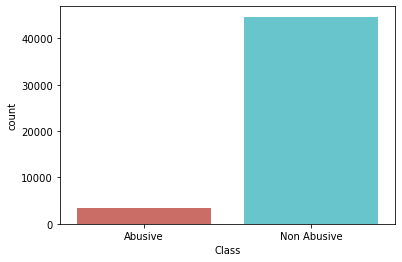

In [20]:
sns.countplot(data["Class"], palette="hls")

In [21]:
print(sum(data["Class"]=="Abusive")/sum(data["Class"]=="Non Abusive")*100, "percent of abusive emails")
print(100 - sum(data["Class"]=="Abusive")/sum(data["Class"]=="Non Abusive")*100, "percent of non-abusive emails")

7.634442305109032 percent of abusive emails
92.36555769489097 percent of non-abusive emails


#### We can see that the percentage of "Abusive" class is very less compared to "Non Abusive" class, hence the data is imbalanced.

In [22]:
data.columns

Index(['Unnamed: 0', 'filename', 'Message-ID', 'content', 'Class'], dtype='object')

In [23]:
# Dropping the unimportant columns like 'Unnamed: 0', 'filename', 'Message-ID'

In [24]:
df = data.drop(columns=['Unnamed: 0', 'filename', 'Message-ID'], axis=1)

In [25]:
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [26]:
# Seperating the "Abusive" and "Non Abusive" classes

In [27]:
abusive = df[df["Class"]=="Abusive"]
abusive.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [28]:
abusive.shape

(3410, 2)

In [29]:
non_abusive = df[df["Class"]=="Non Abusive"]
non_abusive.head()

,content,Class
3410,Here is our forecast\n\n,Non Abusive
3411,Traveling to have a business meeting takes the...,Non Abusive
3412,test successful. way to go!!!,Non Abusive
3413,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive
3414,Let's shoot for Tuesday at 11:45.,Non Abusive


In [30]:
non_abusive.shape

(44666, 2)

In [31]:
# Balancing the data by removing the duplicate values from only "Non Abusive" class

In [32]:
non_abusive1 = non_abusive.drop_duplicates()

In [33]:
non_abusive1.shape

(23014, 2)

In [34]:
print("Abusive ", len(abusive),"\n""Non Abusive ", len(non_abusive1))

Abusive  3410 
Non Abusive  23014


In [35]:
print(len(abusive)/len(non_abusive1)*100, " percentage of abusive mails")
print(100- (len(abusive)/len(non_abusive1))*100, " percentage of non-abusive mails")

14.817067871730252  percentage of abusive mails
85.18293212826975  percentage of non-abusive mails


#### Now we can say the data is more balanced compared to original data 

In [36]:
# Concatinating both 'abusive' and 'non-abusive' data into single dataset

In [37]:
new_df = pd.concat([abusive,non_abusive1], axis=0, ignore_index=True)

In [38]:
new_df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [39]:
new_df.shape

(26424, 2)

In [40]:
# Preprocessing the text

In [41]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize

In [42]:
# Stop words

In [44]:
corpus = []
ps = PorterStemmer()

for i in range(0, new_df.shape[0]):
    # Removing special characters from "title"
    content = re.sub(pattern = '[^a-zA-Z]', repl=' ', string = new_df.content[i])
    
    # Converting the title to lowercase
    content = content.lower()
    
    # Tokenizing the news titles into words 
    words = content.split()
    
    # removing the stop words
    words = [word for word in words if word not in set(stopwords.words('english'))]
    
    # Stemming the words
    words = [ps.stem(word) for word in words]
    
    # Joining the stem words
    title = ' '.join(words)
    
    # Building a corpus of news title 
    corpus.append(title)

In [45]:
corpus[0:10]

['eat shit john j lavorato excelr pm john arnold hou ect ect cc subject footbal bet minn buff phil indi cinnci det clev den dall jack',
 'fuck',
 'gentlemen follow champagn avail approxim retail price also interest trade red wine retail price deriv spec websit winesearc com wine store temperatur control privat wine storag facil quan vintag wine retail perrier jouet brut fleur de champagn piper heidsek reserv dom perignon veuv cliquot ponsardin la grand dame taitteng millesin brut jacquart millesin roeder cristal interest',
 'sorri taken long tri fend chick life sooooo hard sometim monkey brian rourk excelr commun john arnold hou ect ect cc subject yeah monkey monkey hey littl bastard fuck pictur e compani think help score women say balanc sheet yeah monkey b',
 'asshol john j lavorato excelr john arnold hou ect ect cc subject john cant seem make gambl problem go away bill denver jack',
 'asshol john j lavorato excelr john arnold hou ect ect cc subject ram wash raider balt bear lion eag

In [46]:
len(corpus)

26424

In [47]:
# Creating new data using cleaned data

In [48]:
corp = pd.DataFrame(corpus)

In [49]:
new_corp = pd.concat([new_df["Class"], corp], axis=1)

In [50]:
new_corp.head()

,Class,0
0,Abusive,eat shit john j lavorato excelr pm john arnold...
1,Abusive,fuck
2,Abusive,gentlemen follow champagn avail approxim retai...
3,Abusive,sorri taken long tri fend chick life sooooo ha...
4,Abusive,asshol john j lavorato excelr john arnold hou ...


In [51]:
new_corp.rename(columns={0 : "content"}, inplace=True)

In [52]:
new_corp.head()

,Class,content
0,Abusive,eat shit john j lavorato excelr pm john arnold...
1,Abusive,fuck
2,Abusive,gentlemen follow champagn avail approxim retai...
3,Abusive,sorri taken long tri fend chick life sooooo ha...
4,Abusive,asshol john j lavorato excelr john arnold hou ...


In [53]:
# Saving the corpus into a csv file

In [54]:
new_corp.to_csv('Project_NLP_EDA_clean_data.csv') 

In [55]:
# Opening the saved csv file

In [56]:
new_corp = pd.read_csv("Project_NLP_EDA_clean_data.csv")
new_corp.head()

,Unnamed: 0,Class,content
0,0,Abusive,eat shit john j lavorato excelr pm john arnold...
1,1,Abusive,fuck
2,2,Abusive,gentlemen follow champagn avail approxim retai...
3,3,Abusive,sorri taken long tri fend chick life sooooo ha...
4,4,Abusive,asshol john j lavorato excelr john arnold hou ...


In [57]:
# Checking for NA values in cleaned data

In [58]:
new_corp.isna().sum()

Unnamed: 0     0
Class          0
content       19
dtype: int64

In [59]:
# Dropping NA values

In [60]:
new_corp.dropna(axis=0, inplace =True)

In [61]:
new_corp.isna().sum()

Unnamed: 0    0
Class         0
content       0
dtype: int64

In [62]:
new_corp.reset_index(inplace= True)

In [63]:
from collections import Counter

In [64]:
word_list = ' '.join(new_corp["content"])
split_it = word_list.split() 

In [65]:
Count = Counter(split_it) 
most_occur = Count.most_common(30) 

In [66]:
# Most frequent words in the text 

In [67]:
most_occur

[('excelr', 70823),
 ('com', 69661),
 ('ect', 41293),
 ('td', 33406),
 ('http', 31910),
 ('font', 28459),
 ('hou', 20878),
 ('subject', 19567),
 ('e', 18725),
 ('www', 18538),
 ('pm', 18144),
 ('pleas', 17773),
 ('time', 16992),
 ('imag', 16547),
 ('b', 14920),
 ('messag', 14631),
 ('get', 13607),
 ('would', 13405),
 ('new', 13036),
 ('one', 12362),
 ('week', 12361),
 ('thank', 12196),
 ('sent', 12038),
 ('mail', 11669),
 ('cc', 11577),
 ('origin', 11348),
 ('size', 10935),
 ('br', 10746),
 ('trade', 10453),
 ('know', 10451)]

In [68]:
# If more than 75% of emails have it as a top word, exclude it from the list

In [69]:
add_stop_words = [word for word, count in Counter(Count).most_common() if count > 18000 ]
add_stop_words

['excelr',
 'com',
 'ect',
 'td',
 'http',
 'font',
 'hou',
 'subject',
 'e',
 'www',
 'pm']

In [70]:
resultwords  = [word for word in split_it if word not in add_stop_words]

In [71]:
# Most occuring words after removing additional stop words

In [72]:
Count = Counter(resultwords) 

most_occur = Count.most_common(30) 
most_occur

[('pleas', 17773),
 ('time', 16992),
 ('imag', 16547),
 ('b', 14920),
 ('messag', 14631),
 ('get', 13607),
 ('would', 13405),
 ('new', 13036),
 ('one', 12362),
 ('week', 12361),
 ('thank', 12196),
 ('sent', 12038),
 ('mail', 11669),
 ('cc', 11577),
 ('origin', 11348),
 ('size', 10935),
 ('br', 10746),
 ('trade', 10453),
 ('know', 10451),
 ('right', 10391),
 ('day', 10388),
 ('may', 10200),
 ('go', 10122),
 ('compani', 10092),
 ('like', 9936),
 ('need', 9904),
 ('align', 9843),
 ('market', 9823),
 ('type', 9748),
 ('date', 9592)]

In [73]:
words_list = ' '.join(resultwords)

In [74]:
# Worcloud of unique words in the dataset

In [81]:
from wordcloud import WordCloud

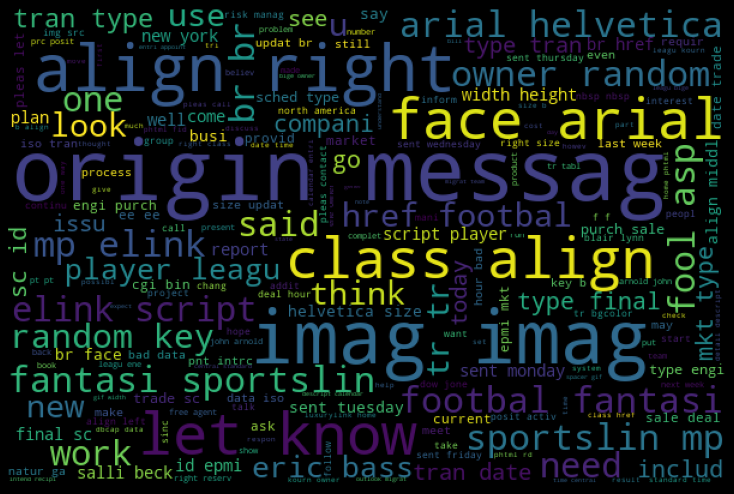

In [82]:
unique_wordcloud = WordCloud(width=600, height=400).generate(words_list)
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(unique_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [83]:
# Abusive data after text processing

In [84]:
abusive = new_corp[new_corp["Class"]=="Abusive"]
abusive.head()

,index,Unnamed: 0,Class,content
0,0,0,Abusive,eat shit john j lavorato excelr pm john arnold...
1,1,1,Abusive,fuck
2,2,2,Abusive,gentlemen follow champagn avail approxim retai...
3,3,3,Abusive,sorri taken long tri fend chick life sooooo ha...
4,4,4,Abusive,asshol john j lavorato excelr john arnold hou ...


In [85]:
# Abusive word cloud

In [86]:
abusive1 = ' '.join(abusive["content"])

In [87]:
abusive_words = abusive1.split()

In [88]:
ab_words  = [word for word in abusive_words if word not in add_stop_words]
ab_words = ' '.join(ab_words)

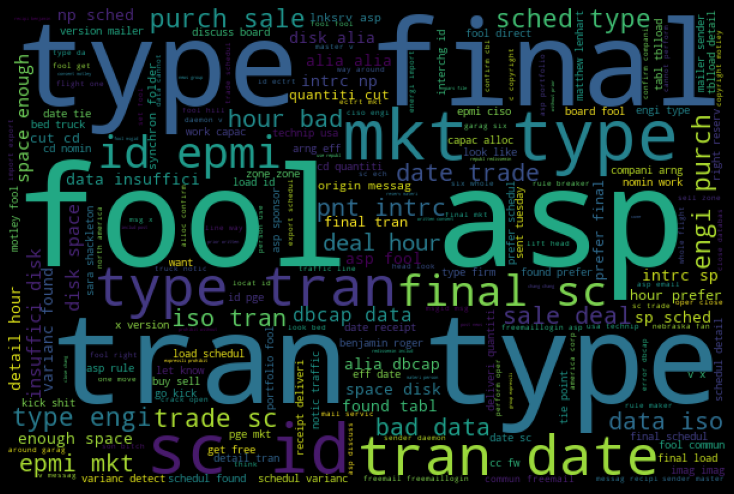

In [89]:
abusive_wordcloud = WordCloud(width=600, height=400, stopwords="english").generate(ab_words)
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(abusive_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [90]:
# Non-abusive data after text processing

In [91]:
non_abusive = new_corp[new_corp["Class"]=="Non Abusive"]
non_abusive.head()

,index,Unnamed: 0,Class,content
3410,3410,3410,Non Abusive,forecast
3411,3411,3411,Non Abusive,travel busi meet take fun trip especi prepar p...
3412,3412,3412,Non Abusive,test success way go
3413,3413,3413,Non Abusive,randi send schedul salari level everyon schedu...
3414,3414,3414,Non Abusive,let shoot tuesday


In [92]:
# Non-abusive word cloud

In [93]:
non_abusive2 = ' '.join(non_abusive["content"])

In [94]:
non_abusive_words = non_abusive2.split()

In [95]:
non_ab_words  = [word for word in non_abusive_words if word not in add_stop_words]
non_ab_words = ' '.join(non_ab_words)

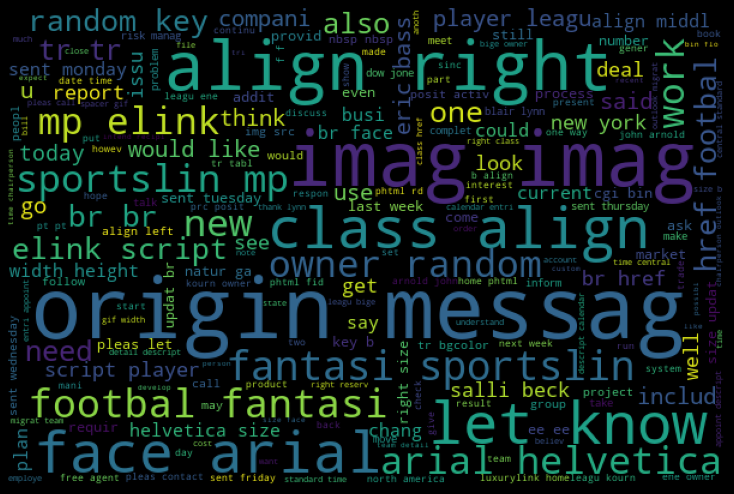

In [96]:
non_abusive_wordcloud = WordCloud(width=600, height=400, stopwords='english').generate(non_ab_words)
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(non_abusive_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [97]:
# Cleaning the data for additional stop words

In [98]:
corpus_new = []

for i in range(0, new_corp.shape[0]):
    content = new_corp["content"][i]
    words = content.split()
    
    # removing the additional stop words
    words = [word for word in words if word not in add_stop_words]
    
    # Joining the words
    title = ' '.join(words)
    
    # Building a corpus of news title 
    corpus_new.append(title)

In [99]:
len(corpus_new)

26405

In [100]:
corpus_new[0:10]

['eat shit john j lavorato john arnold cc footbal bet minn buff phil indi cinnci det clev den dall jack',
 'fuck',
 'gentlemen follow champagn avail approxim retail price also interest trade red wine retail price deriv spec websit winesearc wine store temperatur control privat wine storag facil quan vintag wine retail perrier jouet brut fleur de champagn piper heidsek reserv dom perignon veuv cliquot ponsardin la grand dame taitteng millesin brut jacquart millesin roeder cristal interest',
 'sorri taken long tri fend chick life sooooo hard sometim monkey brian rourk commun john arnold cc yeah monkey monkey hey littl bastard fuck pictur compani think help score women say balanc sheet yeah monkey b',
 'asshol john j lavorato john arnold cc john cant seem make gambl problem go away bill denver jack',
 'asshol john j lavorato john arnold cc ram wash raider balt bear lion eagl bengal pat vike',
 'know hr rep name jennif burn john arnold cc shit head',
 'sorri taken long tri fend chick life 

In [101]:
# Creating new data using cleaned data

In [102]:
corp1 = pd.DataFrame(corpus_new)

In [103]:

new_corp1 = pd.concat([new_corp["Class"], corp1], axis=1)

In [104]:
new_corp1.head()

,Class,0
0,Abusive,eat shit john j lavorato john arnold cc footba...
1,Abusive,fuck
2,Abusive,gentlemen follow champagn avail approxim retai...
3,Abusive,sorri taken long tri fend chick life sooooo ha...
4,Abusive,asshol john j lavorato john arnold cc john can...


In [105]:
new_corp1.rename(columns={0 : "content"}, inplace=True)

In [106]:
new_corp1.head()

,Class,content
0,Abusive,eat shit john j lavorato john arnold cc footba...
1,Abusive,fuck
2,Abusive,gentlemen follow champagn avail approxim retai...
3,Abusive,sorri taken long tri fend chick life sooooo ha...
4,Abusive,asshol john j lavorato john arnold cc john can...


In [107]:
from textblob import TextBlob

In [108]:
# Adding 'length', 'words_count' and 'polarity' columns to dataset

In [109]:
new_corp1['length'] = new_corp1["content"].apply(lambda x: len(x))

In [110]:
new_corp1['word_count'] = new_corp1['content'].apply(lambda x: len(x.split()))

In [111]:
new_corp1['polarity'] = new_corp1['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [112]:
new_corp1.head()

,Class,content,length,word_count,polarity
0,Abusive,eat shit john j lavorato john arnold cc footba...,101,20,-0.200000
1,Abusive,fuck,4,1,-0.400000
2,Abusive,gentlemen follow champagn avail approxim retai...,375,55,0.250000
3,Abusive,sorri taken long tri fend chick life sooooo ha...,208,36,-0.134524
4,Abusive,asshol john j lavorato john arnold cc john can...,96,18,0.000000


In [113]:
# Seperating the "Abusive" and "Non Abusive" classes

In [114]:
abusive = new_corp1[new_corp1["Class"]=="Abusive"]
abusive.head()

,Class,content,length,word_count,polarity
0,Abusive,eat shit john j lavorato john arnold cc footba...,101,20,-0.200000
1,Abusive,fuck,4,1,-0.400000
2,Abusive,gentlemen follow champagn avail approxim retai...,375,55,0.250000
3,Abusive,sorri taken long tri fend chick life sooooo ha...,208,36,-0.134524
4,Abusive,asshol john j lavorato john arnold cc john can...,96,18,0.000000


In [115]:
abusive.shape

(3410, 5)

In [116]:
non_abusive = new_corp1[new_corp1["Class"]=="Non Abusive"]
non_abusive.head()

,Class,content,length,word_count,polarity
3410,Non Abusive,forecast,8,1,0.0000
3411,Non Abusive,travel busi meet take fun trip especi prepar p...,436,75,0.1375
3412,Non Abusive,test success way go,19,4,0.3000
3413,Non Abusive,randi send schedul salari level everyon schedu...,102,16,0.0000
3414,Non Abusive,let shoot tuesday,17,3,0.0000


In [117]:
non_abusive.shape

(22995, 5)

In [118]:
# Length distribution plot

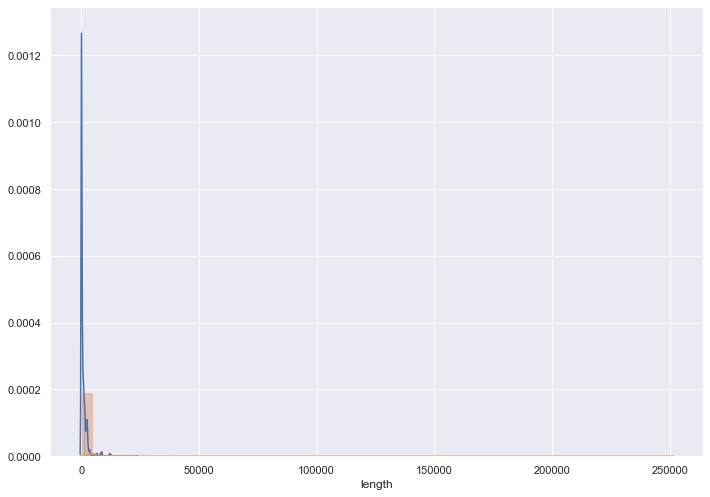

In [119]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(abusive["length"], hist=True, label="abusive")
sns.distplot(non_abusive["length"], hist=True, label="non_abusive");

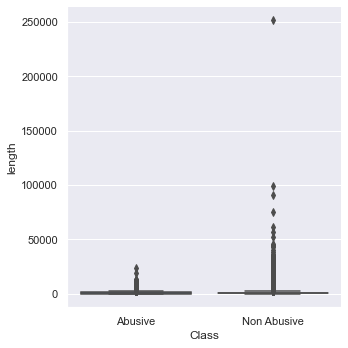

In [120]:
sns.catplot(x="Class", y="length",data=new_corp1, kind= "box")

In [121]:
abusive.length.mean()

856.9131964809384

In [122]:
non_abusive.length.mean()

952.9632528810611

#### It can be observed that the mean length of non_abusive emails is higher than mean length of abusive emails

In [123]:
# Word_count distribution plot

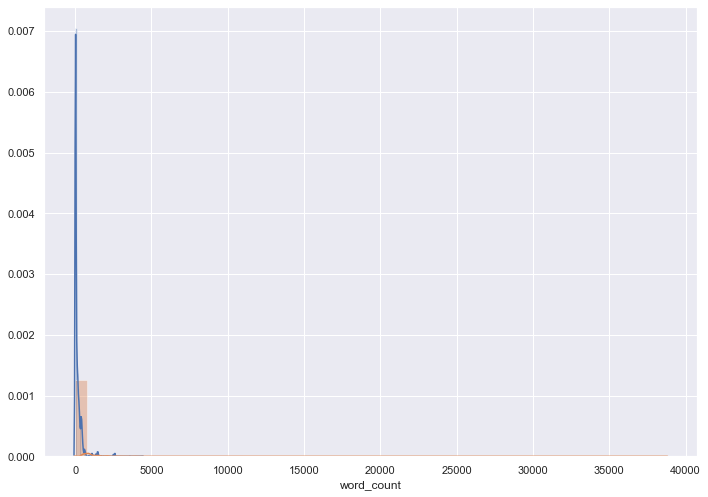

In [124]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(abusive.word_count, hist=True, label="abusive")
sns.distplot(non_abusive.word_count, hist=True, label="non_abusive");

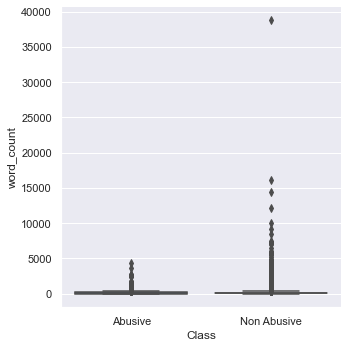

In [125]:
sns.catplot(x="Class", y="word_count",data=new_corp1, kind= "box")

In [126]:
abusive['word_count'].mean()

148.80821114369502

In [127]:
non_abusive['word_count'].mean()

156.43774733637747

#### It can be observed that the mean word_count of non_abusive emails is slightly higher than mean word_count of abusive emails

### Distribution of Unigram, Bigram and Trigram

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

In [134]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(1, 1), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [135]:
words = get_top_n_words(new_corp1['content'], 20)

In [136]:
words

[('pleas', 17773),
 ('time', 16992),
 ('imag', 16547),
 ('messag', 14631),
 ('new', 13036),
 ('week', 12361),
 ('thank', 12196),
 ('sent', 12038),
 ('mail', 11669),
 ('cc', 11577),
 ('origin', 11348),
 ('size', 10935),
 ('br', 10746),
 ('trade', 10453),
 ('know', 10451),
 ('right', 10391),
 ('day', 10388),
 ('compani', 10092),
 ('like', 9936),
 ('need', 9904)]

### Unigram

In [137]:
df_unigram = pd.DataFrame(words, columns= ['Unigram', 'Frequency'])

In [138]:
df_unigram

,Unigram,Frequency
0,pleas,17773
1,time,16992
2,imag,16547
3,messag,14631
4,new,13036
5,week,12361
6,thank,12196
7,sent,12038
8,mail,11669
9,cc,11577


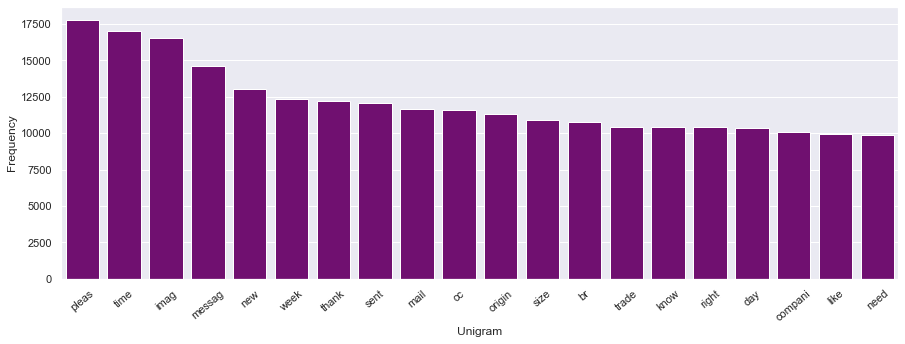

In [146]:
plt.figure(figsize=(15,5))
g= sns.barplot("Unigram",'Frequency', data=df_unigram, color="purple")
g.set_xticklabels(df_unigram["Unigram"], rotation=40)
plt.show()

### Bigram

In [147]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [148]:
words = get_top_n_words(new_corp1['content'], 20)
words

[('origin messag', 9594),
 ('imag imag', 7334),
 ('align right', 5423),
 ('let know', 4871),
 ('class align', 3985),
 ('face arial', 3962),
 ('fantasi sportslin', 3776),
 ('sportslin mp', 3654),
 ('footbal fantasi', 3653),
 ('arial helvetica', 3551),
 ('fool asp', 3459),
 ('br br', 3420),
 ('mp elink', 3416),
 ('owner random', 3414),
 ('elink script', 3414),
 ('random key', 3235),
 ('href footbal', 3117),
 ('tr tr', 2991),
 ('player leagu', 2868),
 ('eric bass', 2835)]

In [149]:
df_bigram = pd.DataFrame(words, columns= ['Bigram', 'Frequency'])
df_bigram

,Bigram,Frequency
0,origin messag,9594
1,imag imag,7334
2,align right,5423
3,let know,4871
4,class align,3985
5,face arial,3962
6,fantasi sportslin,3776
7,sportslin mp,3654
8,footbal fantasi,3653
9,arial helvetica,3551


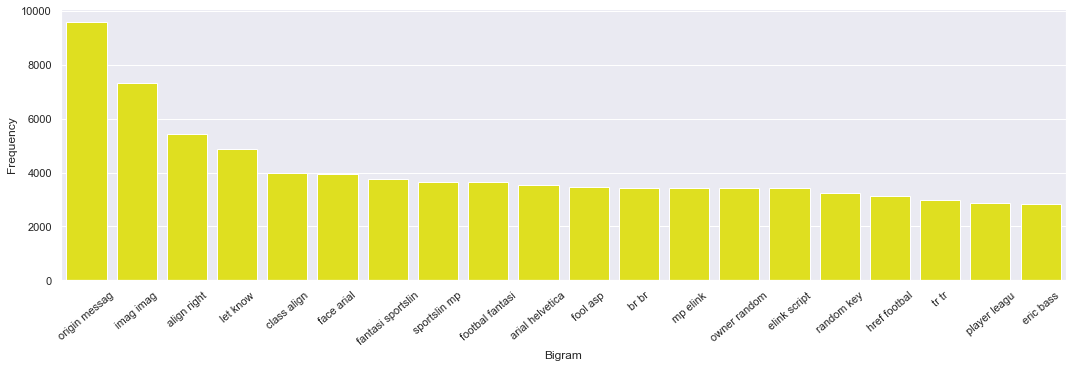

In [151]:
plt.figure(figsize=(18,5))
g= sns.barplot("Bigram",'Frequency', data=df_bigram, color="yellow")
g.set_xticklabels(df_bigram["Bigram"], rotation=40)
plt.show()

### Trigram

In [152]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [153]:
words = get_top_n_words(new_corp1['content'], 20)

In [154]:
words

[('imag imag imag', 4692),
 ('fantasi sportslin mp', 3651),
 ('footbal fantasi sportslin', 3649),
 ('mp elink script', 3414),
 ('sportslin mp elink', 3412),
 ('owner random key', 3235),
 ('face arial helvetica', 3210),
 ('href footbal fantasi', 3111),
 ('class align right', 2810),
 ('tran type final', 2761),
 ('mkt type tran', 2582),
 ('type tran date', 2582),
 ('elink script player', 2436),
 ('type final sc', 2264),
 ('final sc id', 2264),
 ('script player leagu', 2230),
 ('sc id epmi', 2042),
 ('arial helvetica size', 1933),
 ('sched type engi', 1897),
 ('type engi purch', 1897)]

In [155]:
df_trigram = pd.DataFrame(words, columns= ['Trigram', 'Frequency'])

In [156]:
df_trigram

,Trigram,Frequency
0,imag imag imag,4692
1,fantasi sportslin mp,3651
2,footbal fantasi sportslin,3649
3,mp elink script,3414
4,sportslin mp elink,3412
5,owner random key,3235
6,face arial helvetica,3210
7,href footbal fantasi,3111
8,class align right,2810
9,tran type final,2761


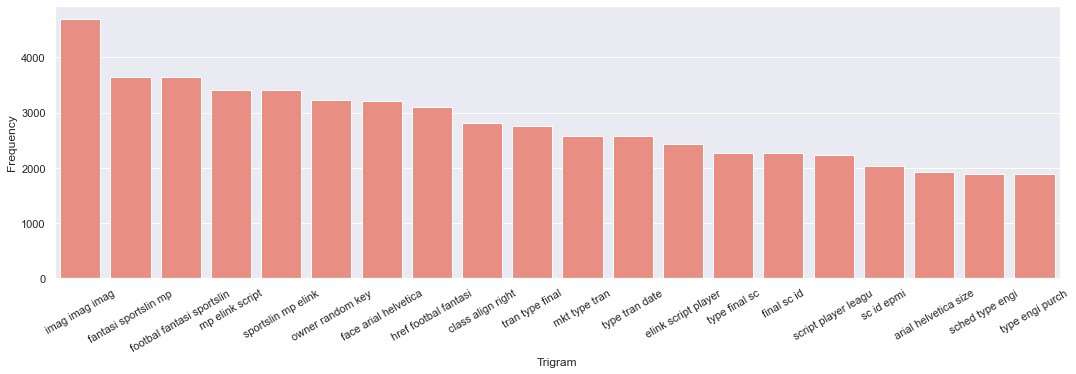

In [158]:
plt.figure(figsize=(18,5))
g= sns.barplot("Trigram",'Frequency', data=df_trigram, color="salmon")
g.set_xticklabels(df_trigram["Trigram"], rotation=30)
plt.show()

In [159]:
corpus = new_corp1['content'].tolist()

In [160]:
corpus[0:10]

['eat shit john j lavorato john arnold cc footbal bet minn buff phil indi cinnci det clev den dall jack',
 'fuck',
 'gentlemen follow champagn avail approxim retail price also interest trade red wine retail price deriv spec websit winesearc wine store temperatur control privat wine storag facil quan vintag wine retail perrier jouet brut fleur de champagn piper heidsek reserv dom perignon veuv cliquot ponsardin la grand dame taitteng millesin brut jacquart millesin roeder cristal interest',
 'sorri taken long tri fend chick life sooooo hard sometim monkey brian rourk commun john arnold cc yeah monkey monkey hey littl bastard fuck pictur compani think help score women say balanc sheet yeah monkey b',
 'asshol john j lavorato john arnold cc john cant seem make gambl problem go away bill denver jack',
 'asshol john j lavorato john arnold cc ram wash raider balt bear lion eagl bengal pat vike',
 'know hr rep name jennif burn john arnold cc shit head',
 'sorri taken long tri fend chick life 

## Building of Bag of Words

In [161]:
from sklearn.feature_extraction.text import CountVectorizer

In [162]:
cv = CountVectorizer(max_features=5000)

In [163]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [166]:
# Indepedent variables

In [164]:
X = cv.fit_transform(corpus).toarray()

In [165]:
X.shape

(26405, 5000)

In [167]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [168]:
# Dependent variable

In [169]:
class_values = pd.get_dummies(new_corp1['Class'])
class_values = class_values.drop(columns="Non Abusive")
class_values = class_values.rename(columns={"Abusive":"Class"})

In [170]:
y = class_values.values.ravel()

In [171]:
# Splitting the train test data

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [174]:
print(X_train.shape,'\n',
     X_test.shape)

(21124, 5000) 
 (5281, 5000)


In [175]:
# Bag of words

In [176]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [177]:
count_df.head()

,aa,aaron,ab,abandon,abc,abel,abil,abl,abramo,absenc,...,zadow,zd,zdnet,zdnetonebox,zero,zima,zip,zipper,zone,zufferli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

### Building Naive Bayes model

In [178]:
from sklearn.naive_bayes import MultinomialNB

In [179]:
nb_classifier = MultinomialNB()

In [180]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [181]:
# Predicting the values

In [182]:
y_pred_train = nb_classifier.predict(X_train)
y_pred_test = nb_classifier.predict(X_test)

In [183]:
# Confusion matrix

In [184]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [185]:
confusion_matrix(y_train, y_pred_train)

array([[17918,   457],
       [  613,  2136]], dtype=int64)

In [186]:
confusion_matrix(y_test, y_pred_test)

array([[4490,  130],
       [ 147,  514]], dtype=int64)

In [189]:
pd.crosstab(y_test,
           y_pred_test,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,4490,130
1,147,514


In [187]:
# Checking accuracy, precision and recall

In [190]:
# For training

In [191]:
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)

In [192]:
print("Accuracy for train: ", accuracy)
print("Precision for train: ", precision)
print("Recall for train: ", recall)

Accuracy for train:  0.9493467146373793
Precision for train:  0.8237562668723486
Recall for train:  0.7770098217533649


In [193]:
# For testing

In [194]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

In [195]:
print("Accuracy for test: ", accuracy)
print("Precision for test: ", precision)
print("Recall for test: ", recall)

Accuracy for test:  0.9475478129142207
Precision for test:  0.7981366459627329
Recall for test:  0.7776096822995462


### Hyperparameter tuning of Naive Bayes model

In [ ]:
# Tuning the parameter 'alpha' to improve the accuracy

In [196]:
classifier=MultinomialNB(alpha=0.1)

In [197]:
previous_score=0
for alpha in np.arange(0.1,1.1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(round(alpha,1),score))

Alpha: 0.1, Score : 0.9483052452187086
Alpha: 0.2, Score : 0.9486839613709525
Alpha: 0.3, Score : 0.9486839613709525
Alpha: 0.4, Score : 0.9484946032948305
Alpha: 0.5, Score : 0.9483052452187086
Alpha: 0.6, Score : 0.9483052452187086
Alpha: 0.7, Score : 0.9481158871425867
Alpha: 0.8, Score : 0.9479265290664647
Alpha: 0.9, Score : 0.9475478129142207
Alpha: 1.0, Score : 0.9475478129142207


#### Highest accuracy is obtanined for the value alpha =0.3

### Logistic regression model

In [198]:
from sklearn.linear_model import LogisticRegression

In [199]:
lr_classifier = LogisticRegression(max_iter=500, random_state=0)

In [200]:
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=0)

In [201]:
# Predicting the values

In [202]:
y_pred_train = lr_classifier.predict(X_train)

In [203]:
y_pred_test = lr_classifier.predict(X_test)

In [204]:
# Confusion matrix

In [205]:
confusion_matrix(y_train, y_pred_train)

array([[18375,     0],
       [   43,  2706]], dtype=int64)

In [206]:
confusion_matrix(y_test, y_pred_test)

array([[4595,   25],
       [  44,  617]], dtype=int64)

In [207]:
pd.crosstab(y_test,
           y_pred_test,
           rownames=["Actual"],
           colnames=["Predicted"])

Predicted,0,1
Actual,,
0,4595,25
1,44,617


In [208]:
# Accuracy score, precision and recall

In [209]:
# For training

In [210]:
Accuracy = accuracy_score(y_train, y_pred_train)
Precision = precision_score(y_train, y_pred_train)
Recall = recall_score(y_train, y_pred_train)

In [211]:
print("Accuracy for train: ", Accuracy)
print("Precision for train: ", Precision)
print("Recall for train: ", Recall)

Accuracy for train:  0.9979644006816891
Precision for train:  1.0
Recall for train:  0.9843579483448527


In [212]:
# For testing

In [213]:
Accuracy = accuracy_score(y_test, y_pred_test)
Precision = precision_score(y_test, y_pred_test)
Recall = recall_score(y_test, y_pred_test)

In [214]:
print("Accuracy for test: ", Accuracy)
print("Precision for test: ", Precision)
print("Recall for test: ", Recall)

Accuracy for test:  0.9869342927475857
Precision for test:  0.9610591900311527
Recall for test:  0.9334341906202723


### Hyperparameter tuning for logistic regression

In [215]:
classifier=LogisticRegression(C=1)

In [216]:
previous_score=0
for i in np.arange(0.1,1.1,0.1):
    sub_classifier=LogisticRegression(max_iter=500, C=i, random_state=0)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("C: {}, Score : {}".format(round(i,1),score))

C: 0.1, Score : 0.9774663889414884
C: 0.2, Score : 0.982389698920659
C: 0.3, Score : 0.9844726377580004
C: 0.4, Score : 0.9842832796818785
C: 0.5, Score : 0.9850407119863662
C: 0.6, Score : 0.985608786214732
C: 0.7, Score : 0.9861768604430979
C: 0.8, Score : 0.9863662185192198
C: 0.9, Score : 0.9865555765953418
C: 1.0, Score : 0.9869342927475857


#### Highest accuracy is obtained for the value of C=1

## TFIDF Vectorizer

In [217]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [218]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,1))

In [219]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [223]:
tfidf_v.get_feature_names()[:10]

['aa',
 'aaron',
 'ab',
 'abandon',
 'abc',
 'abel',
 'abil',
 'abl',
 'abramo',
 'absenc']

In [ ]:
# Independent variables

In [221]:
X = tfidf_v.fit_transform(corpus).toarray()

In [222]:
X.shape

(26405, 5000)

In [224]:
# Dependent variable

In [225]:
class_values = pd.get_dummies(new_corp1['Class'])
class_values = class_values.drop(columns="Non Abusive")
class_values = class_values.rename(columns={"Abusive":"Class"})

In [226]:
y = class_values.values.ravel()

In [227]:
# Splitting the train test data

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [229]:
# TFIDF vecotorized words

In [230]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head()

,aa,aaron,ab,abandon,abc,abel,abil,abl,abramo,absenc,...,zadow,zd,zdnet,zdnetonebox,zero,zima,zip,zipper,zone,zufferli
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.045022,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.052454,0.0,0.0,0.0,0.0,0.0
2,0.0,0.124515,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.175902,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


### Building Naive Bayes model

In [231]:
from sklearn.naive_bayes import MultinomialNB

In [232]:
nb_classifier = MultinomialNB()

In [233]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [234]:
# Predicting the values

In [235]:
y_pred_train = nb_classifier.predict(X_train)
y_pred_test = nb_classifier.predict(X_test)

In [ ]:
# Confusion matrix

In [236]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [237]:
confusion_matrix(y_train, y_pred_train)

array([[18131,   244],
       [  711,  2038]], dtype=int64)

In [238]:
confusion_matrix(y_test, y_pred_test)

array([[4546,   74],
       [ 185,  476]], dtype=int64)

In [239]:
pd.crosstab(y_test,
           y_pred_test,
           rownames=["Actual"],
           colnames=["Predicted"])

Predicted,0,1
Actual,,
0,4546,74
1,185,476


In [240]:
# Checking accuracy, precision and recall

In [241]:
# For training

In [242]:
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)

In [243]:
print("Accuracy for train: ", accuracy)
print("Precision for train: ", precision)
print("Recall for train: ", recall)

Accuracy for train:  0.9547907593258852
Precision for train:  0.8930762489044698
Recall for train:  0.7413604947253547


In [244]:
# For testing

In [245]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

In [246]:
print("Accuracy for test: ", accuracy)
print("Precision for test: ", precision)
print("Recall for test: ", recall)

Accuracy for test:  0.9509562582844159
Precision for test:  0.8654545454545455
Recall for test:  0.7201210287443268


### Hyperparameter tuning of Naive Bayes model

In [247]:
# Tuning the parameter 'alpha' to improve the accuracy

In [248]:
classifier=MultinomialNB(alpha=0.1)

In [249]:
previous_score=0
for alpha in np.arange(0.1,1.1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(round(alpha,1),score))

Alpha: 0.1, Score : 0.9549327778829767
Alpha: 0.2, Score : 0.953796629426245
Alpha: 0.3, Score : 0.9545540617307328
Alpha: 0.4, Score : 0.9545540617307328
Alpha: 0.5, Score : 0.9541753455784889
Alpha: 0.6, Score : 0.953796629426245
Alpha: 0.7, Score : 0.953796629426245
Alpha: 0.8, Score : 0.9520924067411475
Alpha: 0.9, Score : 0.9509562582844159
Alpha: 1.0, Score : 0.9509562582844159


#### Highest accuracy is obtanined for the value alpha =0.1

### Logistic regression model

In [250]:
from sklearn.linear_model import LogisticRegression

In [251]:
lr_classifier = LogisticRegression(max_iter=500, random_state=0)

In [252]:
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=0)

In [253]:
# Predicting the values

In [254]:
y_pred_train = lr_classifier.predict(X_train)

In [255]:
y_pred_test = lr_classifier.predict(X_test)

In [256]:
# Confusion matrix

In [257]:
confusion_matrix(y_train, y_pred_train)

array([[18333,    42],
       [  410,  2339]], dtype=int64)

In [258]:
confusion_matrix(y_test, y_pred_test)

array([[4605,   15],
       [ 103,  558]], dtype=int64)

In [259]:
pd.crosstab(y_test,
           y_pred_test,
           rownames=["Actual"],
           colnames=["Predicted"])

Predicted,0,1
Actual,,
0,4605,15
1,103,558


In [260]:
# Accuracy score, precision and recall

In [261]:
# For training

In [262]:
Accuracy = accuracy_score(y_train, y_pred_train)
Precision = precision_score(y_train, y_pred_train)
Recall = recall_score(y_train, y_pred_train)

In [263]:
print("Accuracy for train: ", Accuracy)
print("Precision for train: ", Precision)
print("Recall for train: ", Recall)

Accuracy for train:  0.97860253739822
Precision for train:  0.9823603527929441
Recall for train:  0.8508548563113859


In [264]:
# For testing

In [265]:
Accuracy = accuracy_score(y_test, y_pred_test)
Precision = precision_score(y_test, y_pred_test)
Recall = recall_score(y_test, y_pred_test)

In [266]:
print("Accuracy for test: ", Accuracy)
print("Precision for test: ", Precision)
print("Recall for test: ", Recall)

Accuracy for test:  0.9776557470176103
Precision for test:  0.9738219895287958
Recall for test:  0.8441754916792739


### Hyperparameter tuning for logistic regression

In [267]:
classifier=LogisticRegression(C=1)

In [268]:
previous_score=0
for i in np.arange(0.1,1.1,0.1):
    sub_classifier=LogisticRegression(max_iter=500, C=i, random_state=0)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("C: {}, Score : {}".format(round(i,1),score))

C: 0.1, Score : 0.9166824465063435
C: 0.2, Score : 0.9401628479454649
C: 0.3, Score : 0.9549327778829767
C: 0.4, Score : 0.9623177428517327
C: 0.5, Score : 0.9676197689831472
C: 0.6, Score : 0.9710282143533422
C: 0.7, Score : 0.9738685854951714
C: 0.8, Score : 0.9755728081802689
C: 0.9, Score : 0.9774663889414884
C: 1.0, Score : 0.9776557470176103


#### Highest accuracy is obtained for the value of C=1

#### Between bag of words and TFIDF, bag of words got the highest accuracy of 98.69% in logistic regression with C=1.